# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

from functools import partial, reduce
from itertools import combinations, starmap

first = lambda iterable: next(iter(iterable)) # Gets the first item of an iterable
apply = lambda func, args=(): func(*args) # A functional function that used to be a part of Python
pipe = lambda arg, funcs: reduce(lambda arg, func: func(arg), funcs, arg) # Allows for F♯-style piping of data


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [2]:
# Load data
df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.

df.duplicated() \
  .sum()

720

In [4]:
#  2. Modify our df to have all duplicate rows removed. 

df.drop_duplicates(inplace=True)

In [5]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

df.duplicated() \
  .sum()

0

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [6]:
# * Which column has the most null values and how many null values does it have?

df.isnull() \
  .sum() \
  .to_frame('nulls') \
  .query('nulls == nulls.max()')

,nulls
Engine HP,69


In [7]:
# * Print how long our dataframe is.

len(df)

11194

In [8]:
# * Remove any row that has a null value in it. 

df.dropna(inplace=True)

In [9]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.

len(df)

11092

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

<AxesSubplot:xlabel='Make'>

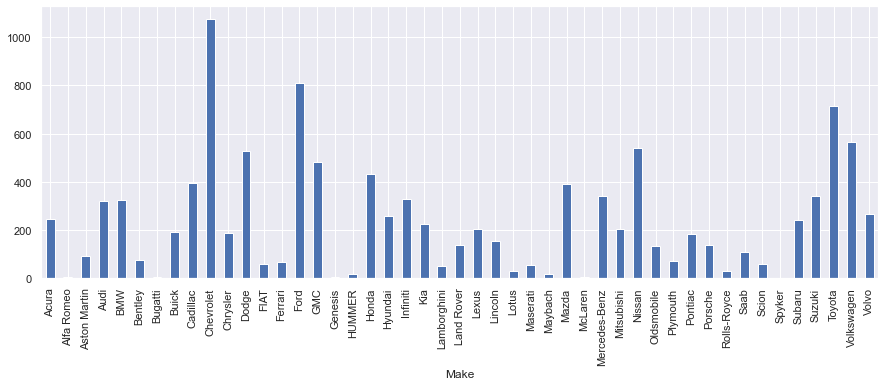

In [10]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

df.groupby('Make') \
  .size() \
  .plot(kind='bar',
        figsize=(15, 5))

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

<AxesSubplot:ylabel='Make'>

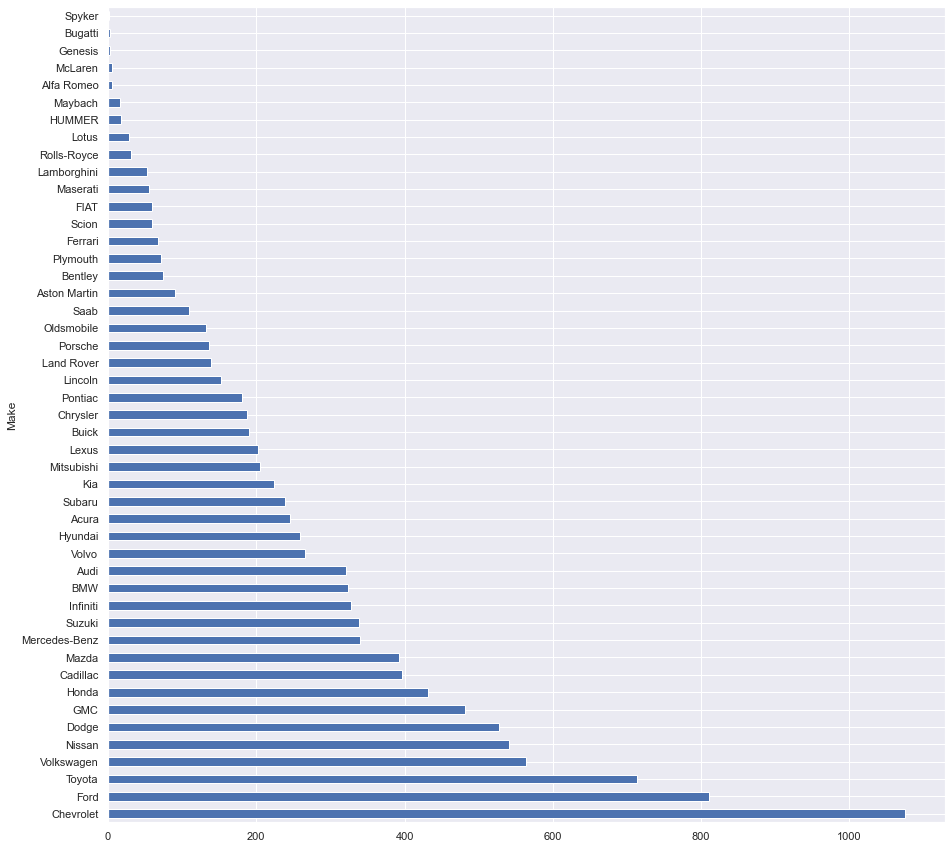

In [11]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

df.groupby('Make') \
  .size() \
  .sort_values(ascending=False) \
  .plot(kind='barh',
        figsize=(15, 15))

### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


<AxesSubplot:xlabel='Year'>

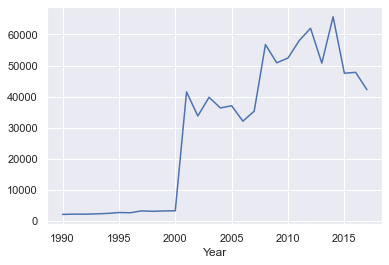

In [12]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.

df.groupby('Year') \
  .MSRP \
  .mean() \
  .plot(kind='line')

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [13]:
# Make a column where is 10 when year is less than 2000, else 1.
df['price_correction_factor'] = np.where(df.Year <= 2000, 10, 1)

# Multiply the MSRP by the price adjuster.
df['adjusted_price'] = df.MSRP * df.price_correction_factor

# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

<AxesSubplot:xlabel='Year'>

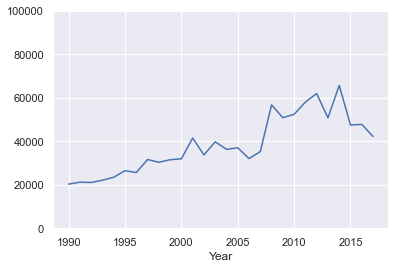

In [14]:
# Plot new prices

df.groupby('Year') \
  .adjusted_price \
  .mean() \
  .plot(kind='line',
        ylim=(0, 100000))

# What are top 5 car makers that make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. (hint, you can use .head())
* Use our `adjusted_price` column for this
* Hint; you're going to have to do a .groupby to answer this.

In [15]:
# What are the top 5 car makers make the most expensive cars on average. 

df.groupby('Make') \
  .adjusted_price \
  .mean() \
  .sort_values(ascending=False) \
  .head() \
  .to_frame() \
  .style.format('${:,.2f}'.format) # Formats the results nicely and elegantly

,adjusted_price
Make,
Bugatti,"$1,757,223.67"
Maybach,"$546,221.88"
Rolls-Royce,"$351,130.65"
Lamborghini,"$331,567.31"
Bentley,"$247,169.32"


# What are the 5 car makers that have the highest median highway MPG?

In [16]:
# Which car makers have the highest median highway MPG?

df.groupby('Make') \
  ['highway MPG'] \
  .median() \
  .sort_values(ascending=False) \
  .head() \
  .to_frame() \
  .style.format('{:,.0f}'.format) # Formats the results nicely and elegantly

,highway MPG
Make,
Alfa Romeo,34
FIAT,33
Volkswagen,32
Scion,32
Honda,32


# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']
* Create a temp_df to store the dataframe of just these values.
* Set the 'hue='Make''.

[Text(0.5, 1.0, 'Histogram of Models by Price')]

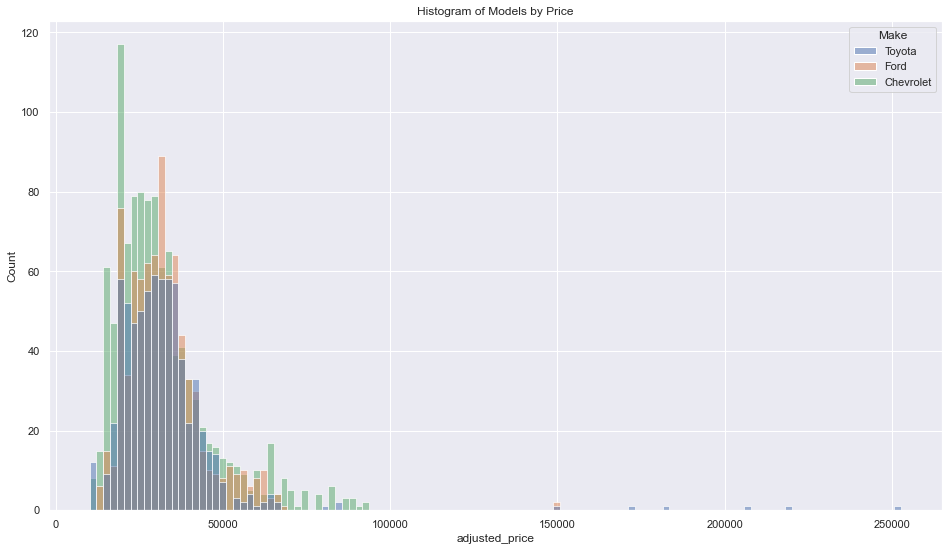

In [17]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.

temp_df = df.query('Make in ("Chevrolet", "Ford", "Toyota")') \
            .get(['Make' ,'adjusted_price'])
sns.set(rc={'figure.figsize': (16, 9)}) # Sets the figure size for Seaborn
temp_df.pipe(sns.histplot,
             x='adjusted_price',
             hue='Make') \
       .set(title='Histogram of Models by Price')

# Remake the same histogram, but limit the x-axis from 0 to 100,000

[(0.0, 100000.0), Text(0.5, 1.0, 'Histogram of Models by Price')]

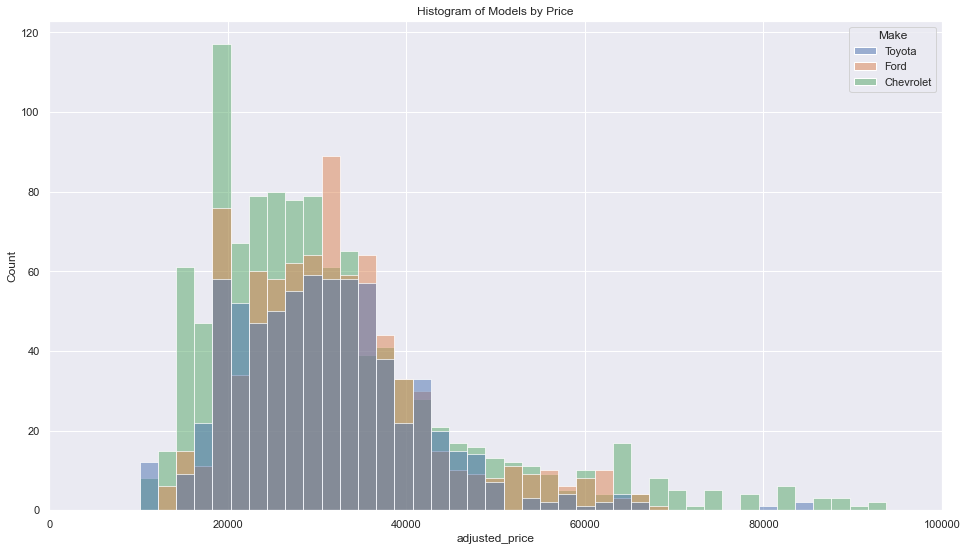

In [18]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000

temp_df.pipe(sns.histplot,
             x='adjusted_price',
             hue='Make') \
       .set(xlim=(0, 100000),
            title='Histogram of Models by Price')

# Plot the relationship between Engine HP and highway MPG

<AxesSubplot:xlabel='highway MPG', ylabel='Engine HP'>

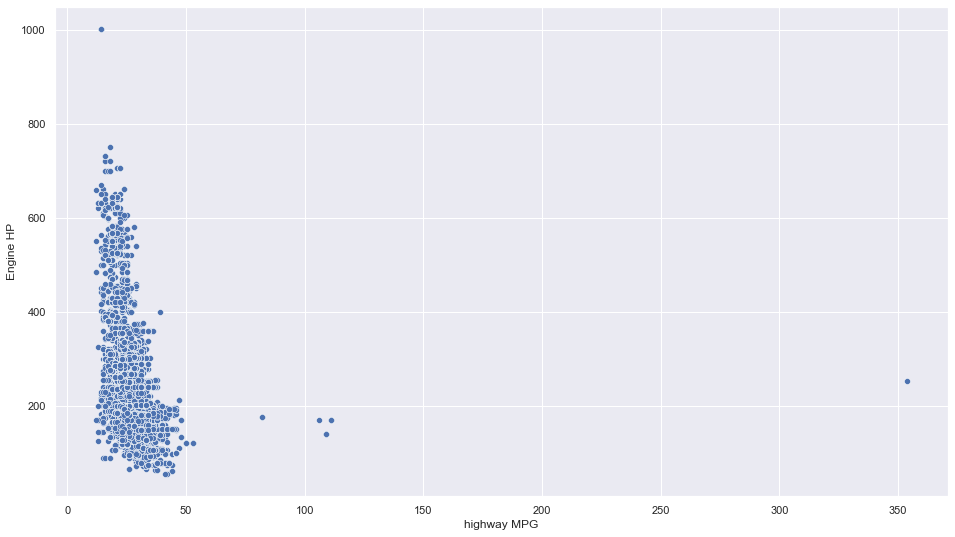

In [19]:
# Plot the relationship between Engine HP and highway MPG

sns.scatterplot(data=df,
                x='highway MPG',
                y='Engine HP')

# Using `sns.boxplot`, create a boxplot for the 'Engine HP'

<AxesSubplot:xlabel='Engine HP'>

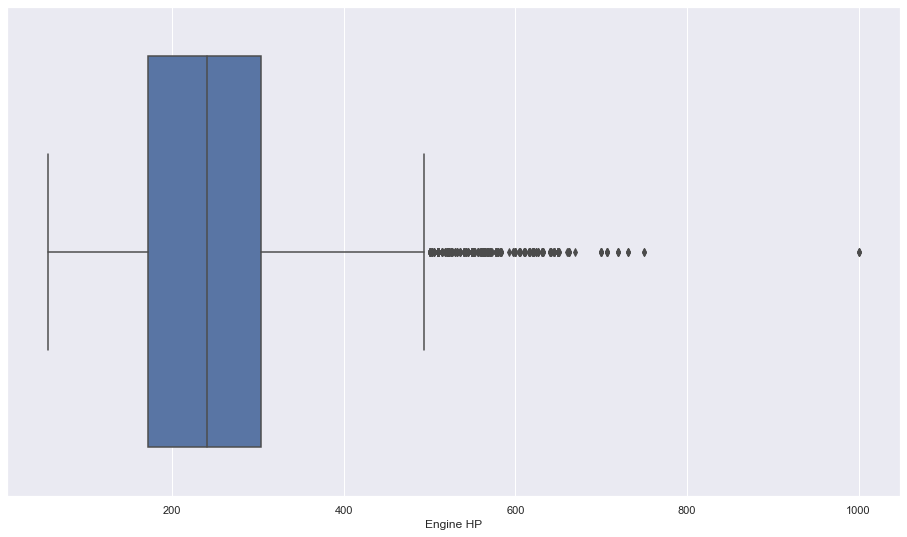

In [20]:
# create a boxplot for the 'Engine HP'

sns.boxplot(data=df,
            x='Engine HP')

# Make another boxplot for highway MPG

<AxesSubplot:xlabel='highway MPG'>

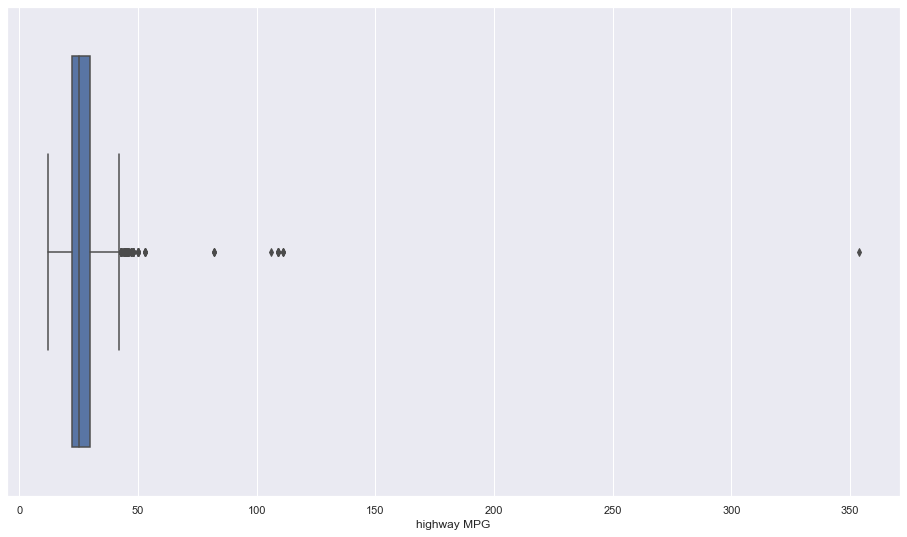

In [21]:
# create a boxplot for the 'highway MPG'

sns.boxplot(data=df,
            x='highway MPG')

# Remove any  outliers from Engine HP and highway MPG 

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

* Outliers meaning values that are outside 1.5x the Inter Quartile Range (see image above).
* For each column (Engine HP and highway MPG):
* Calculate the 0.25 and 0.75 Quantiles
* Calculate the Inter Quartile Range (IQR)
* Create condition mask for the values that are outliers below (in the 'Minimum' range).
* Create condition mask for the values that are outliers above (in the 'Maximum' range).
* Filter the dataframe to remove any values that are in the above section _OR_ the below section. (hint; it may be easier to use the inverse selection '~'.
* Make the same boxplots of Engine HP and Highway MPG as before but with the this dataframe.

In [22]:
# Remove any  outliers from Engine HP and highway MPG 

def remove_outliers(df, column_name):
    column = df[column_name]
    q1, q3 = column.quantile([0.25, 0.75])
    iqr = q3 - q1
    return df[(q1 - 1.5 * iqr <= column) & \
              (column <= q3 + 1.5 * iqr)]

df = reduce(remove_outliers,
            ['Engine HP', 'highway MPG'],
            df)

# Remake the boxplots for both Engine HP and highway MPG


<AxesSubplot:xlabel='Engine HP'>

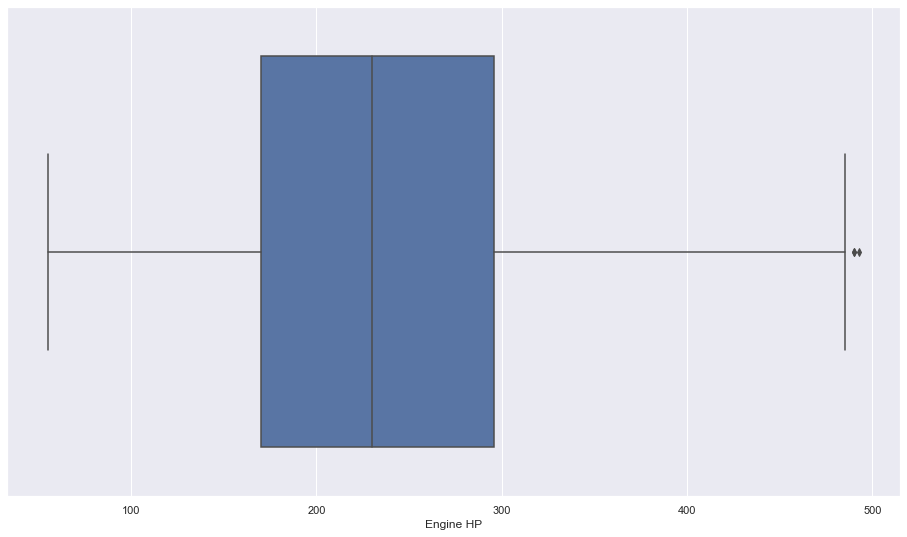

In [23]:
# Engine HP boxplot
sns.boxplot(data=df,
            x='Engine HP')

<AxesSubplot:xlabel='highway MPG'>

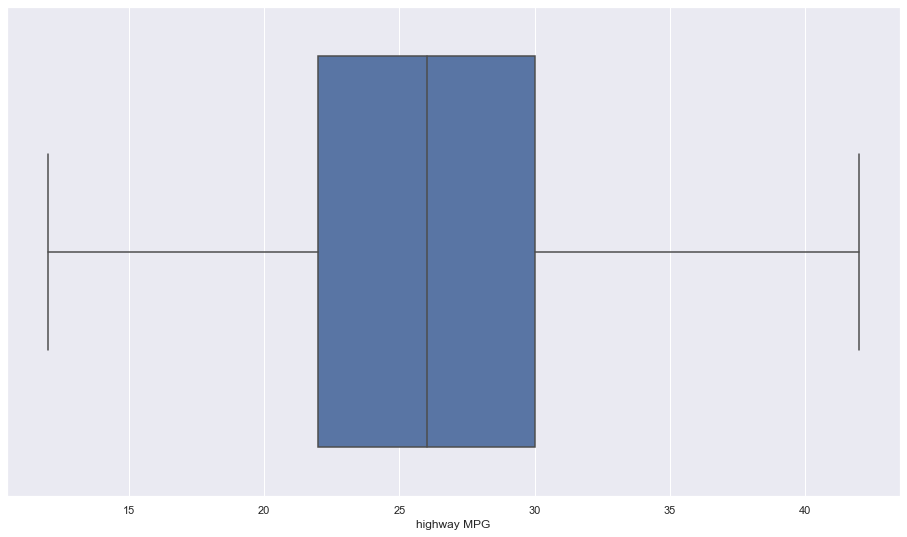

In [24]:
# highway MPG boxplot

sns.boxplot(data=df,
            x='highway MPG')

# Make a scatter plot of Engine HP vs highway MPG

<AxesSubplot:xlabel='highway MPG', ylabel='Engine HP'>

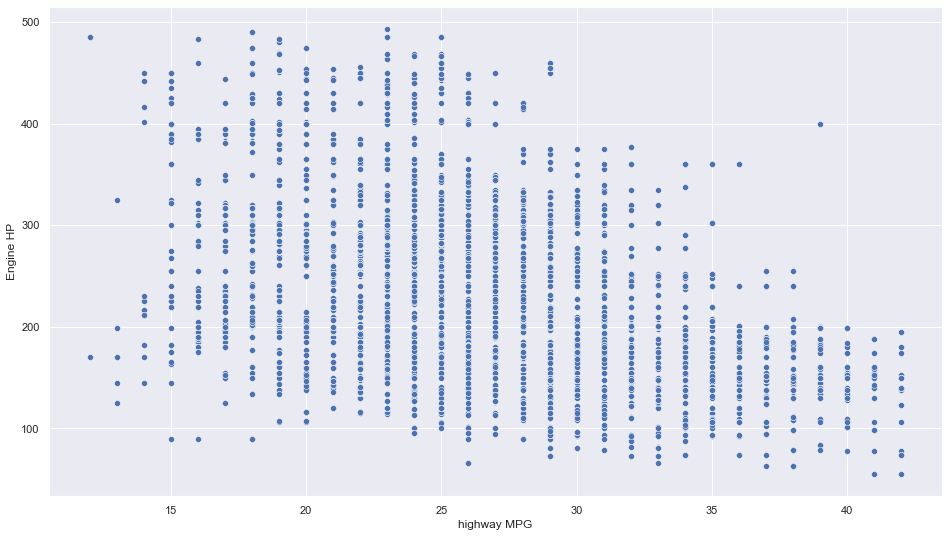

In [25]:
# Make a scatter plot of Engine HP vs highway MPG

sns.scatterplot(data=df,
                x='highway MPG',
                y='Engine HP')

# What does this plot tell you about how Engine HP affects highway MPG?

In [26]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('Engine HP appears to be inversely correlated to highway MPG; the greater the highway MPG, the lower the engine HP. However, the correlation is not very strong.')

Engine HP appears to be inversely correlated to highway MPG; the greater the highway MPG, the lower the engine HP. However, the correlation is not very strong.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

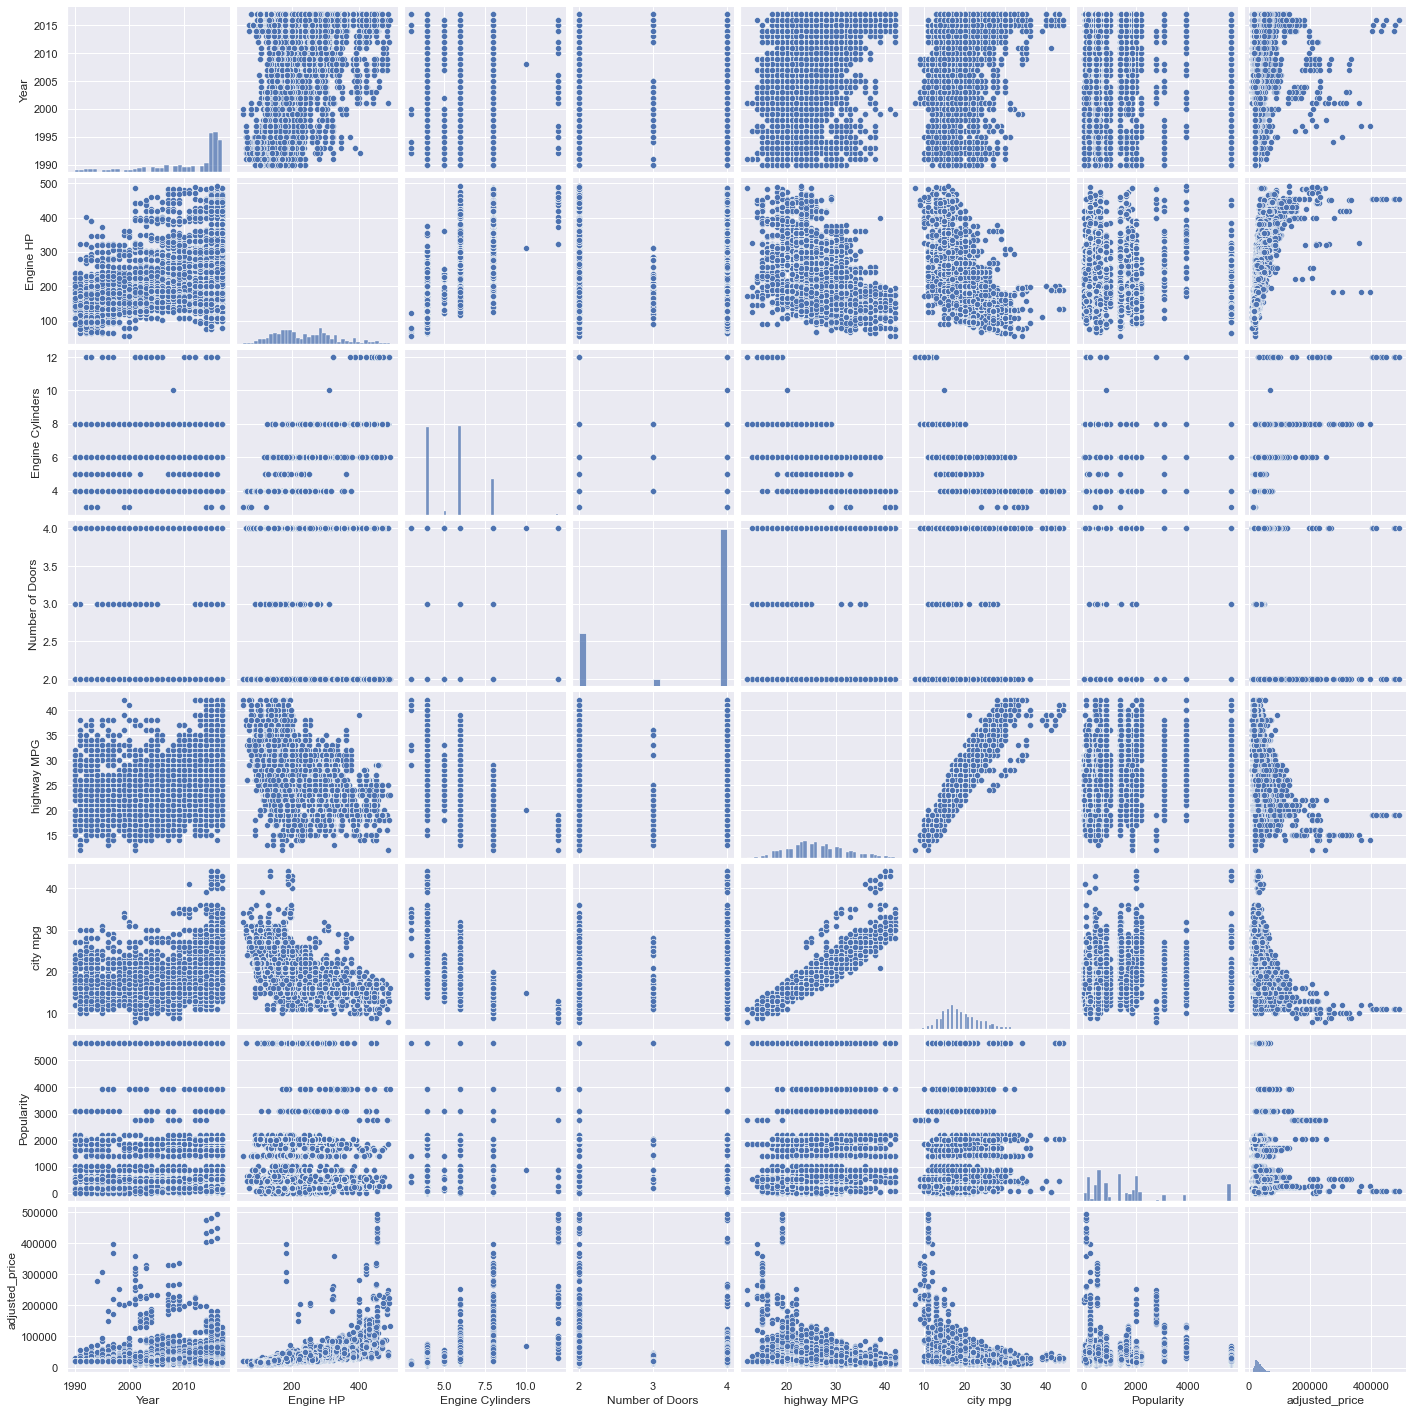

In [27]:
# Using a pairplot, display all of the linear relationship.

df.drop(columns=['MSRP', 'price_correction_factor']) \
  .pipe(sns.pairplot)

In [28]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

def compute_correlations(df):
    return pipe(df, [ # Get the correlations series by piping the data frame through the functions:
        partial(pd.DataFrame.select_dtypes, include=np.number), # Select numeric columns only.
        pd.DataFrame.items,                                     # Get the column name-series tuples.
        partial(sorted,                                         # Sort the list of columns by name
                key=first,                                      # which is the first item of each tuple.
                reverse=True),                                  # The reverse order helps make nicer heat maps.
        partial(combinations, r=2),                             # Generate different combinations of columns.
        partial(starmap, zip),                                  # Transpose each combination in the list.
        partial(apply, zip),                                    # Transpose the list.
        partial(apply, lambda index, series: (                  # Preprocess the arguments to the Series constructor.
            starmap(pd.Series.corr, series),                    # Compute the correlation between each pair of series.
            pd.MultiIndex.from_tuples(index)                    # Convert the list of column name pairs to a MultiIndex.
        )),
        partial(apply, pd.Series),                              # Construct a series of correlations indexed by the column name pairs.
        partial(pd.Series.to_frame, name='correlation')])       # Convert the series to a DataFrame and name it “correlation”.

df.drop(columns=['MSRP',
                 'price_correction_factor']) \
  .pipe(compute_correlations) \
  .sort_values(by='correlation', # Sort the correlations by their absolute values in descending order.
               key=pd.Series.abs,
               ascending=False) \
  .head()

,,correlation
highway MPG,city mpg,0.919652
Engine HP,Engine Cylinders,0.734636
city mpg,Engine Cylinders,-0.726298
highway MPG,Engine Cylinders,-0.705137
adjusted_price,Engine HP,0.608449


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

[Text(0.5, 1.0, 'Heat Map of Correlations')]

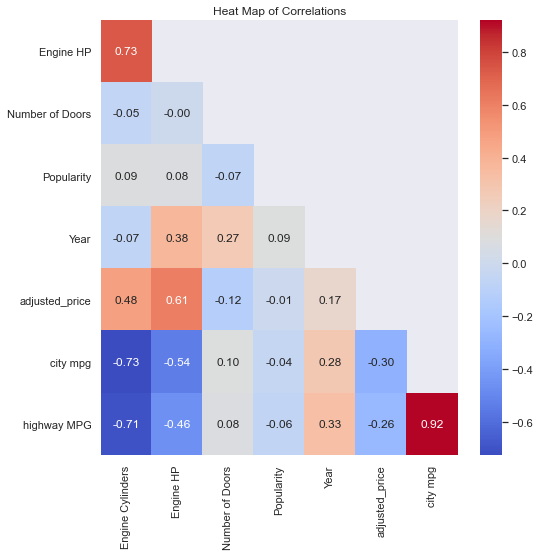

In [29]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

sns.set(rc={'figure.figsize': (8, 8)}) # Sets the figure size for Seaborn
df.drop(columns=['MSRP',
                 'price_correction_factor']) \
  .pipe(compute_correlations) \
  .unstack() \
  .droplevel(0, 1) \
  .pipe(sns.heatmap,
        annot=True,
        fmt='.2f', # Keeps the numbers to 2 decimal places to reduce clutter
        cmap='coolwarm') \
  .set(title='Heat Map of Correlations')

In [30]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('The greater number of engine cylinders contributes to greater engine HP. This seems pretty obvious to a human.')

The greater number of engine cylinders contributes to greater engine HP. This seems pretty obvious to a human.


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well


In [31]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well

df.columns = df.columns \
               .str.lower() \
               .str.replace(' ', '_')

In [32]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,price_correction_factor,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,1,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,1,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,1,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,1,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,1,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120,1,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670,1,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620,1,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920,1,50920
